## <b> Problem Statement:</b>
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### <b>Independent Variables:</b>

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

<b>You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.</b> 

- <b> Importing Required Libraries For EDA, Data Wrangling And Data Cleaning</b>

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [157]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [158]:
print("No Of Rows:-",df.shape[0])
print("Numbers Of Columns:-",df.shape[1],"\n")
print('Top 5 Rows:-',df.head(),"\n")
print("Bottam 5 Rows:-",df.tail())

No Of Rows:- 614
Numbers Of Columns:- 13 

Top 5 Rows:-     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1         

In [159]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Statistical Analysis

In [160]:
df.duplicated().sum()

0

######  Duplicate Value Not Present In Our Data Set  

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- There We Have  614 Rows And 13 Columns Including Target Variable
- Our Target Variable Is "Loan Status", And Datatype Is Object Means Values Are Categorical
- These Variable Are Have  Categorical Data(Object).'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', , 'Property_Area', 'Loan_Status
-These Variable are have Continuous Data(Int And Float).'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'

- These Columns  Have Missing Values Dependents,Gender,Married,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History

In [162]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].fillna(df[i].mode()[0])
        

- Filling The Missing Value In  The Object DataType

In [163]:
df = df.drop(columns =['Loan_ID'])

- We Dont Required Columns Beacause ID Is Uniques Number And This Is Not Correlated With Other Columns 
- Deleting Loan Id Column

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [165]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [166]:
df['Dependents'].replace("3+",3,inplace =True)

In [167]:
df['Dependents'] = df['Dependents'].astype(int)

In [168]:
for i in df.columns:
    if df[i].dtype != 'object':
        df[i] = df[i].fillna(df[i].mean())
        

- Filling Missing Value In Continuous Datatype Columns.

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


-Now There No Missing Values Present In Our DataSet

In [170]:
for i in df.columns:
    print(df[i].value_counts())

Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Yes    401
No     213
Name: count, dtype: int64
Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
342

In [171]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,1.009623,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [172]:
for i in df.columns[1:]:
    print(i," Have Unique Values = ",df[i].unique(),"\n")

Married  Have Unique Values =  ['No' 'Yes'] 

Dependents  Have Unique Values =  [0 1 2 3] 

Education  Have Unique Values =  ['Graduate' 'Not Graduate'] 

Self_Employed  Have Unique Values =  ['No' 'Yes'] 

ApplicantIncome  Have Unique Values =  [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042

# Exploratory Data Analysis.

### Gender 

<Axes: xlabel='Gender', ylabel='count'>

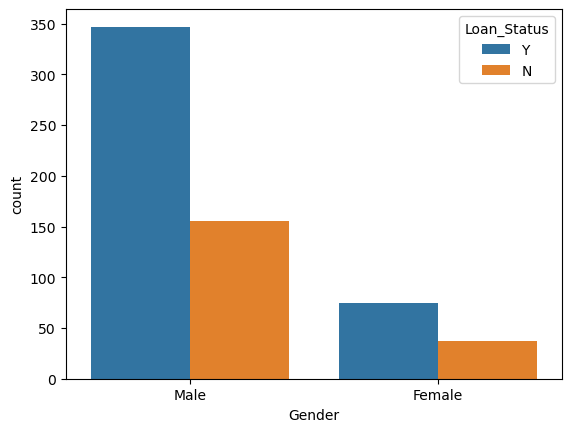

In [173]:
sns.countplot(x='Gender',hue ='Loan_Status',data =df)

-Mostly Loan Applied By Males

In [174]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Married

<Axes: xlabel='Married', ylabel='count'>

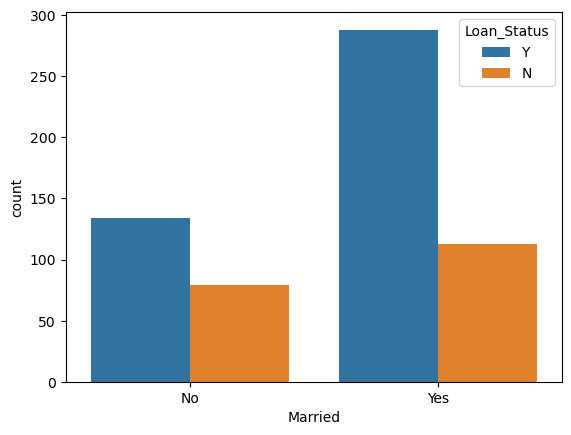

In [175]:
sns.countplot(x='Married',hue ='Loan_Status',data =df)

<Axes: xlabel='Married', ylabel='count'>

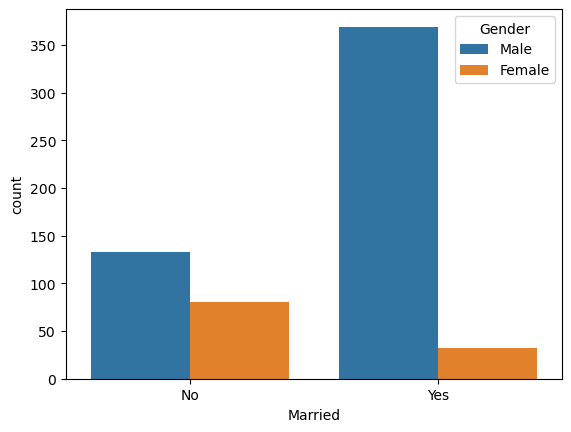

In [176]:
sns.countplot(x='Married',hue ='Gender',data =df)

- Married Male  And Non Married Female Applied For Loan And Male Number  Is Very High. 

<Axes: xlabel='ApplicantIncome', ylabel='Married'>

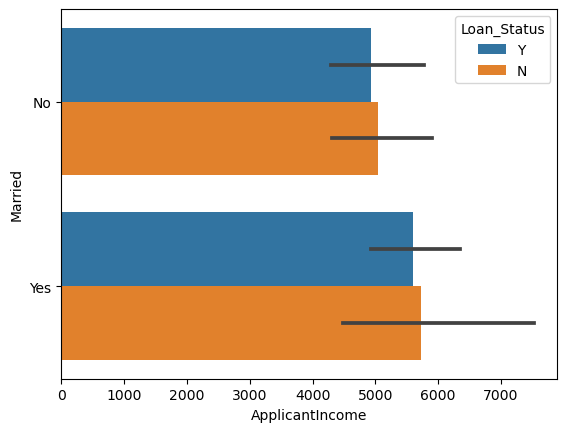

In [177]:
sns.barplot(x='ApplicantIncome',y= 'Married',hue ='Loan_Status',data =df)

### Dependents

<Axes: xlabel='Dependents', ylabel='count'>

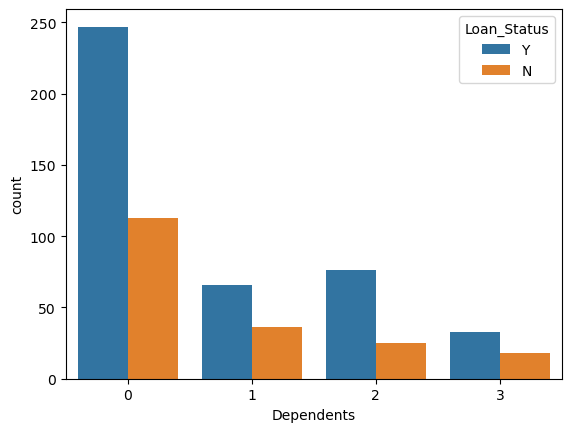

In [178]:
sns.countplot(x='Dependents',hue ='Loan_Status',data =df)

- Majority  Applicant Have 0 Dependents

### Education

<Axes: xlabel='Education', ylabel='count'>

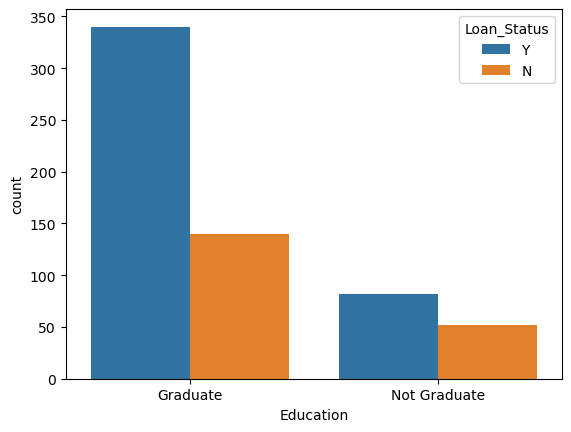

In [179]:
 sns.countplot(x = 'Education',hue = 'Loan_Status',data =df)

- Graducate Applicants Numbers Are High

### Self_Employed

<Axes: xlabel='Self_Employed', ylabel='count'>

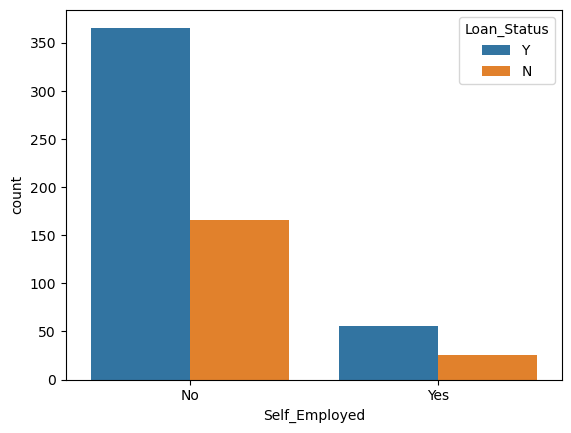

In [180]:
 sns.countplot(x = 'Self_Employed',hue = 'Loan_Status',data =df)

<Axes: xlabel='Self_Employed', ylabel='count'>

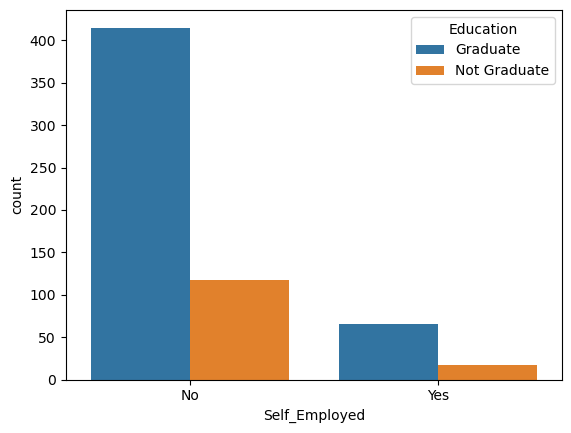

In [181]:
 sns.countplot(x = 'Self_Employed',hue = 'Education',data =df)

- Most Of The Applicant Are Graduate And They Are Self_Employed

### ApplicantIncome

<Axes: xlabel='ApplicantIncome', ylabel='Loan_Status'>

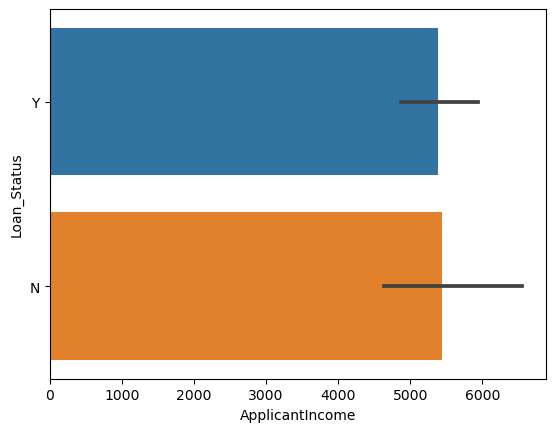

In [182]:
 sns.barplot(x = 'ApplicantIncome',y = 'Loan_Status',data =df)

### CoapplicantIncome

<Axes: xlabel='CoapplicantIncome', ylabel='Loan_Status'>

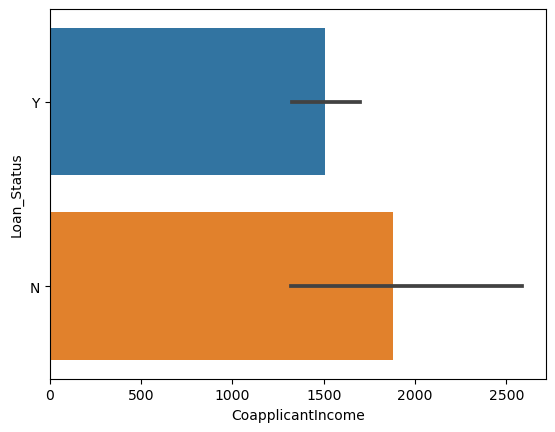

In [183]:
sns.barplot(x = 'CoapplicantIncome', y = 'Loan_Status',data =df)     

### LoanAmount
      

<Axes: xlabel='LoanAmount', ylabel='Gender'>

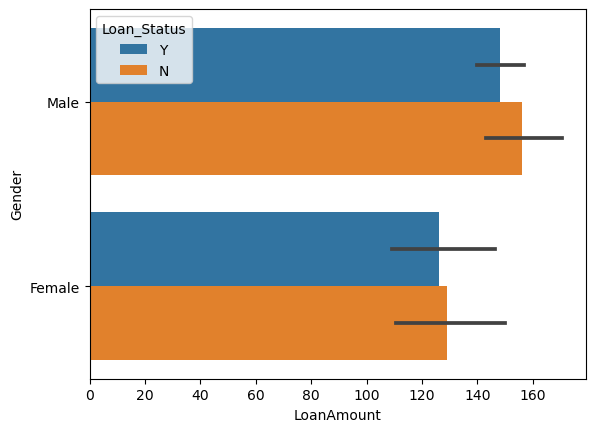

In [184]:
sns.barplot(x = 'LoanAmount',y = 'Gender',hue = 'Loan_Status',data =df)     

### Loan_Amount_Term

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

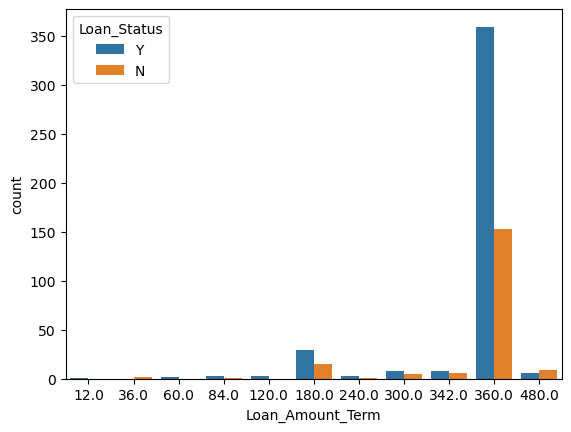

In [185]:
sns.countplot(x = 'Loan_Amount_Term',hue = 'Loan_Status',data =df)     

### Credit_History

<Axes: xlabel='Credit_History', ylabel='count'>

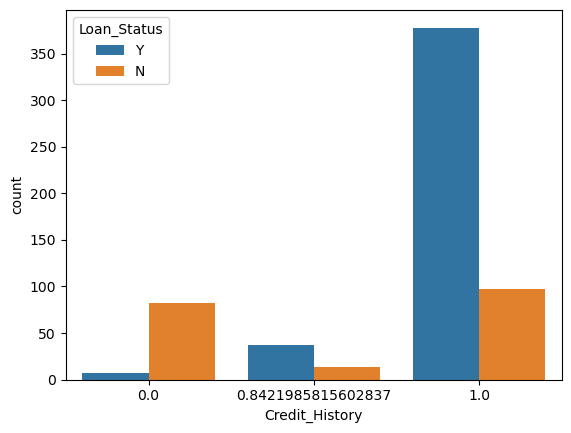

In [186]:
sns.countplot(x = 'Credit_History',hue = 'Loan_Status',data =df)

### Property_Area

<Axes: xlabel='Property_Area', ylabel='count'>

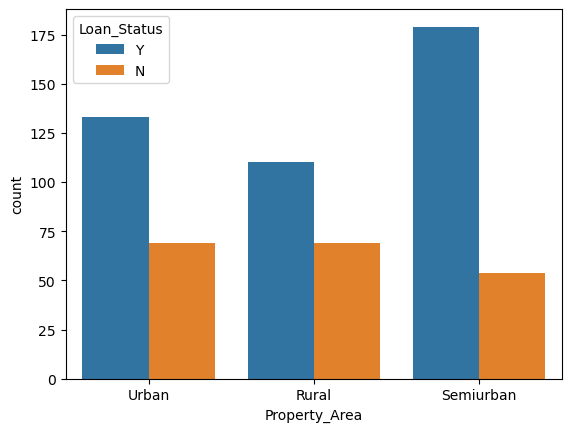

In [187]:
 sns.countplot(x ='Property_Area',hue = 'Loan_Status',data =df)
       

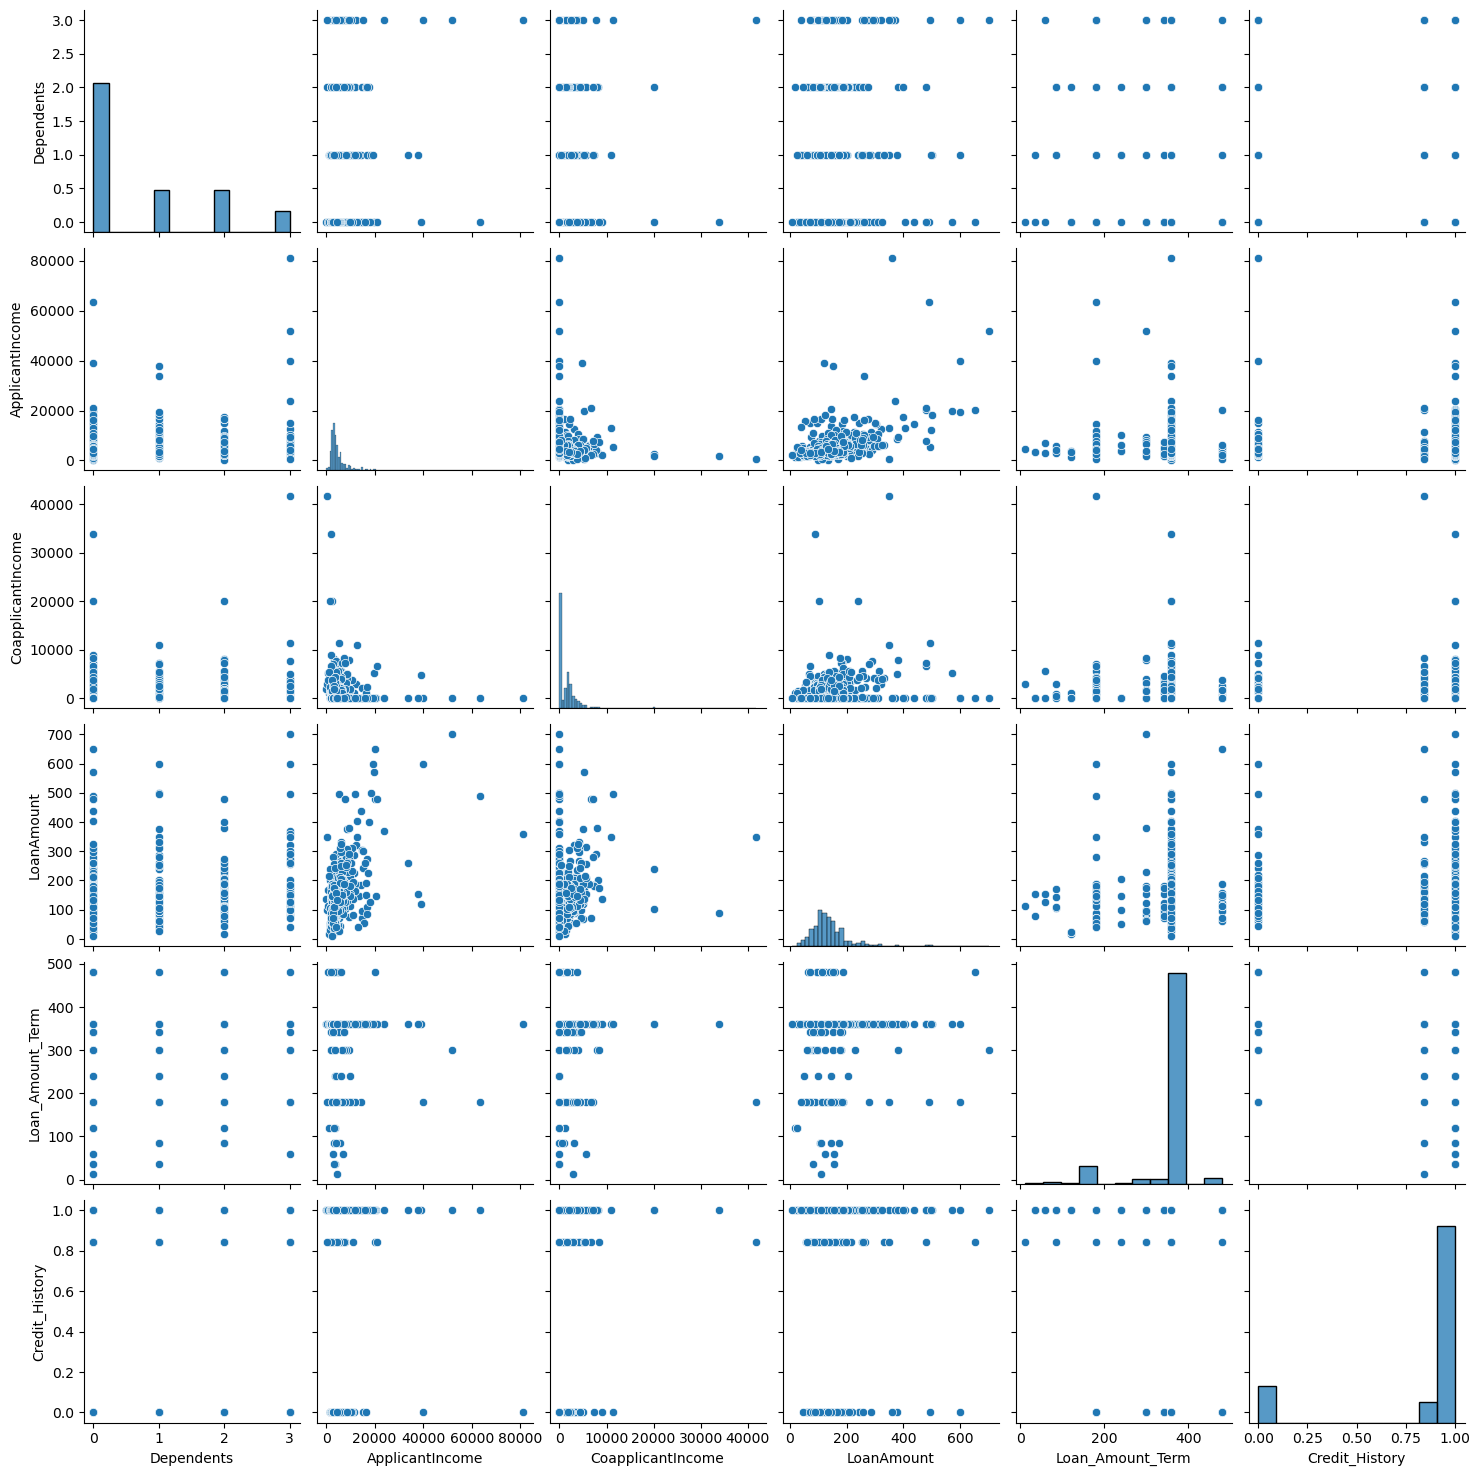

In [188]:
sns.pairplot(df)

In [189]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype =="object":
        df[i]= le.fit_transform(df[i])

###### Covert Columns Data Alphabetical To Numerical 

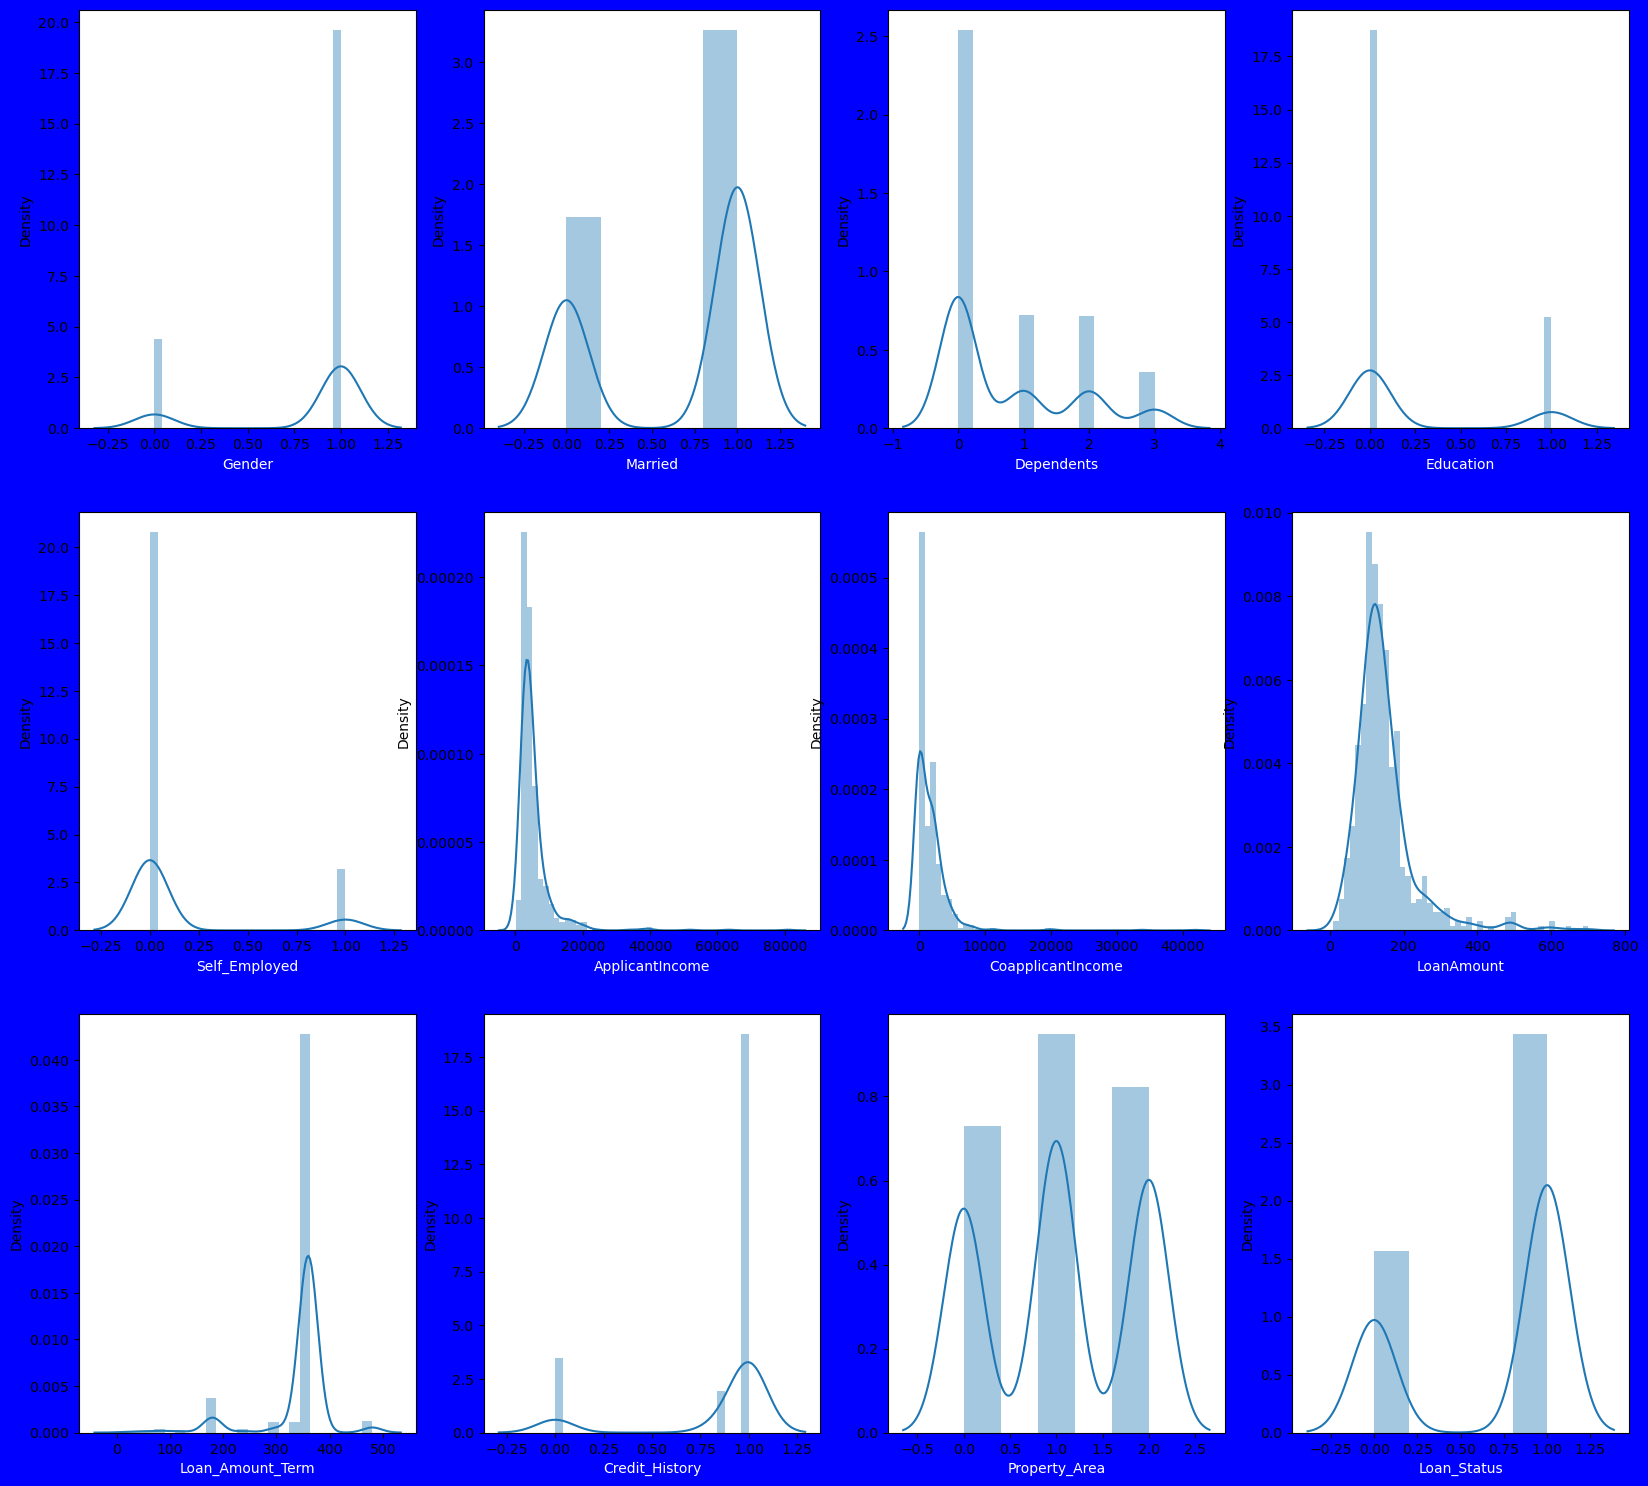

In [190]:
plt.figure(figsize = (20,25), facecolor = "blue")
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns):
        axs = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10,color = "white")
    plotnumber +=1
plt.show()

- We Can See Huge Skewness Is Present In Our DataSet ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term' 

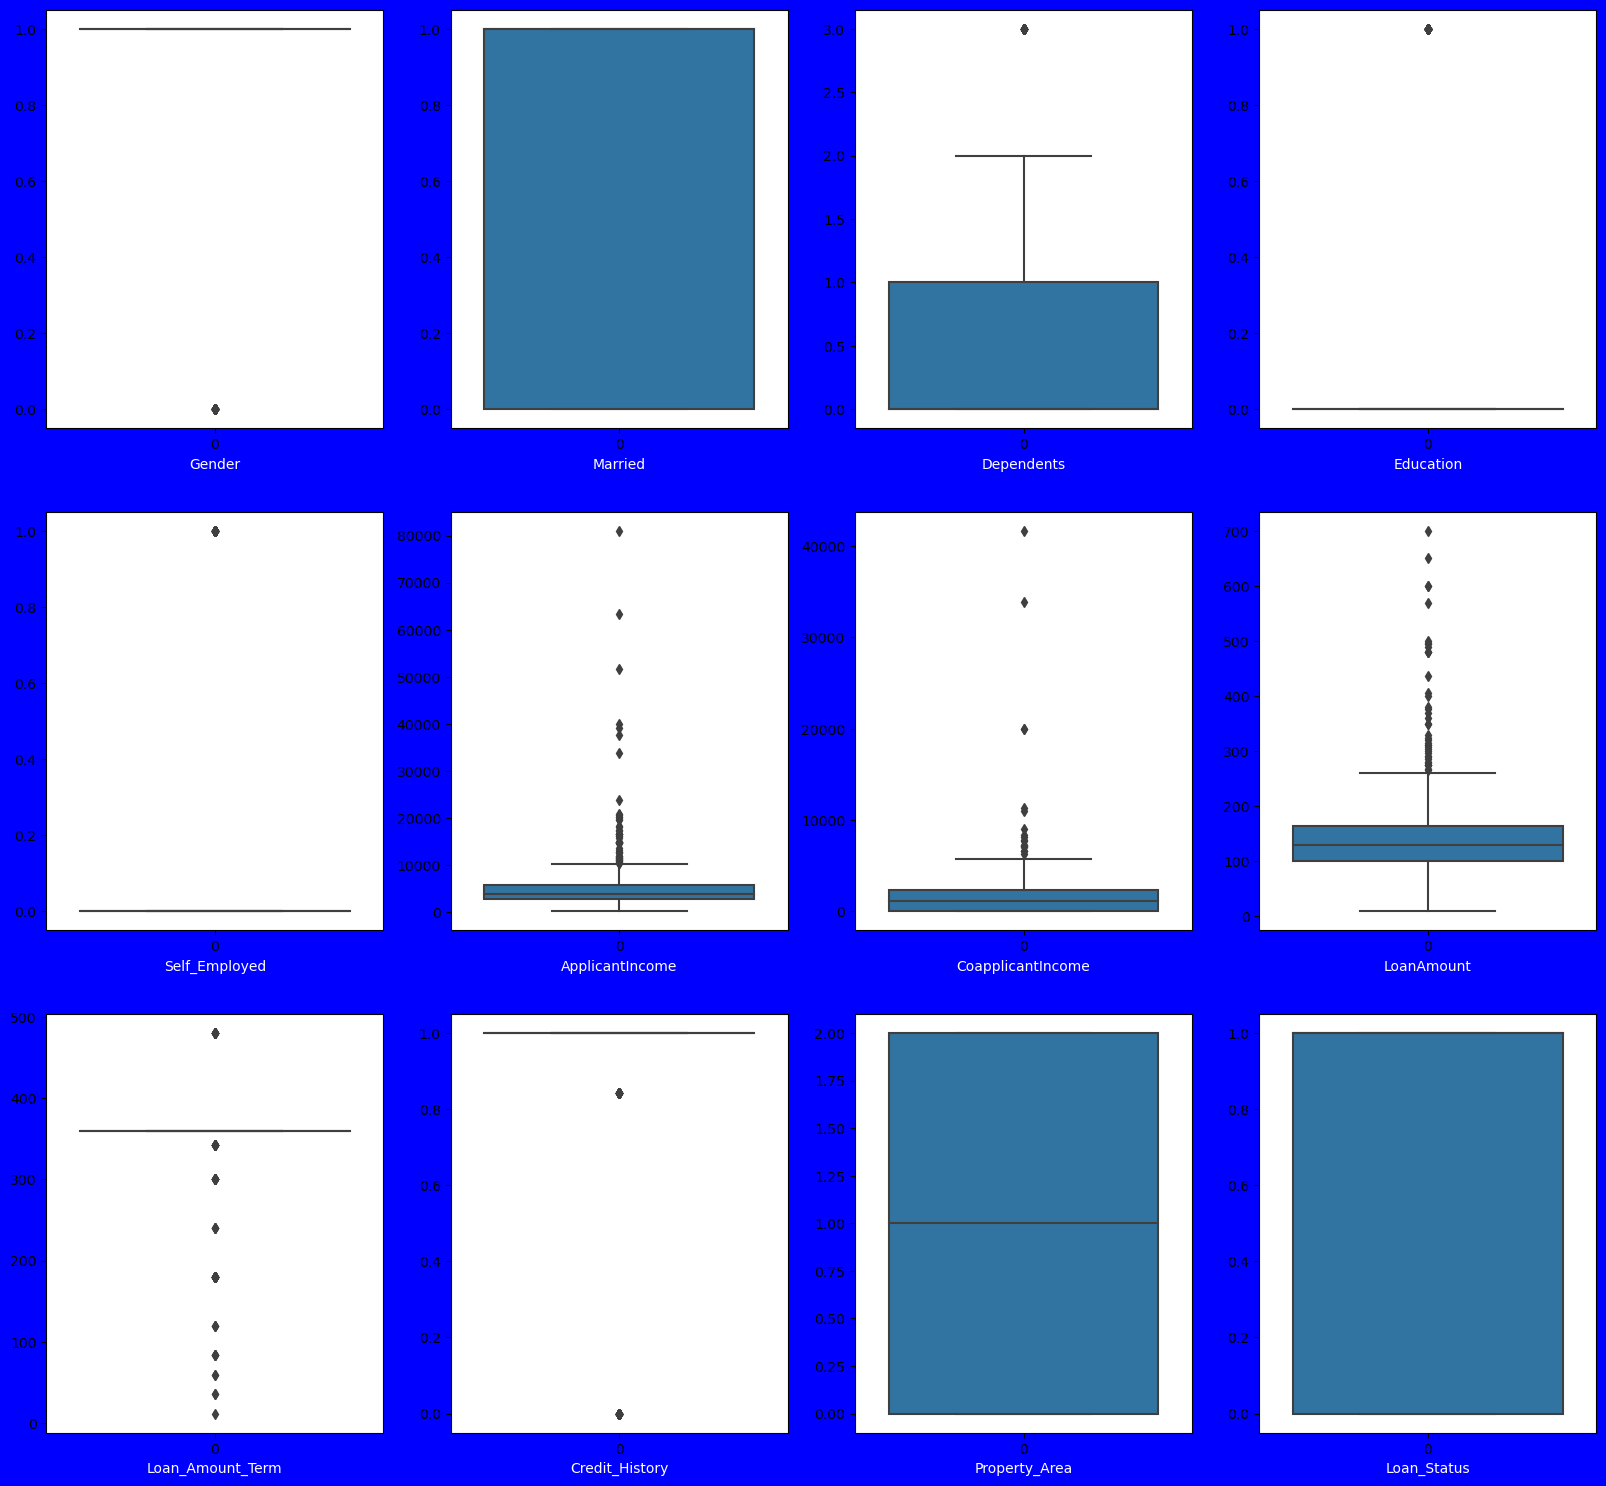

In [191]:
plt.figure(figsize = (20,25), facecolor = "blue")
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns):
        axs = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 10,color = "white")
    plotnumber +=1
plt.show()

- Outliers Present In Our Dataset These Columns Have Outliers -ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Credit_History'

In [192]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [193]:
#Droping The Outliers USing ZStats
from scipy.stats import zscore
z_score = zscore(df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term",]])
abs_z_score = np.abs(z_score)
filtering = (abs_z_score<3).all(axis = 1)
df =df[filtering]
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.814558,0.649913,0.719237,0.227036,0.126516,4666.020797,1420.807487,136.048644,347.604853,0.838646,1.031196,0.689775
std,0.388993,0.477411,0.995229,0.419280,0.332719,2965.452652,1651.545352,56.193532,51.819095,0.353795,0.789953,0.462987
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,180.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2833.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3750.000000,1255.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5532.000000,2253.000000,160.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,20667.000000,8980.000000,380.000000,480.000000,1.000000,2.000000,1.000000


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    int32  
 1   Married            577 non-null    int32  
 2   Dependents         577 non-null    int32  
 3   Education          577 non-null    int32  
 4   Self_Employed      577 non-null    int32  
 5   ApplicantIncome    577 non-null    int64  
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Property_Area      577 non-null    int32  
 11  Loan_Status        577 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 42.8 KB


In [195]:
#Using Boxcox Method  for remove Skewness
from scipy.stats import boxcox
for i in ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]:
    if df.dtypes[i] != 'object':
        trnsfrm_data, _ = boxcox(df[i]+1)
        df[i] =trnsfrm_data    

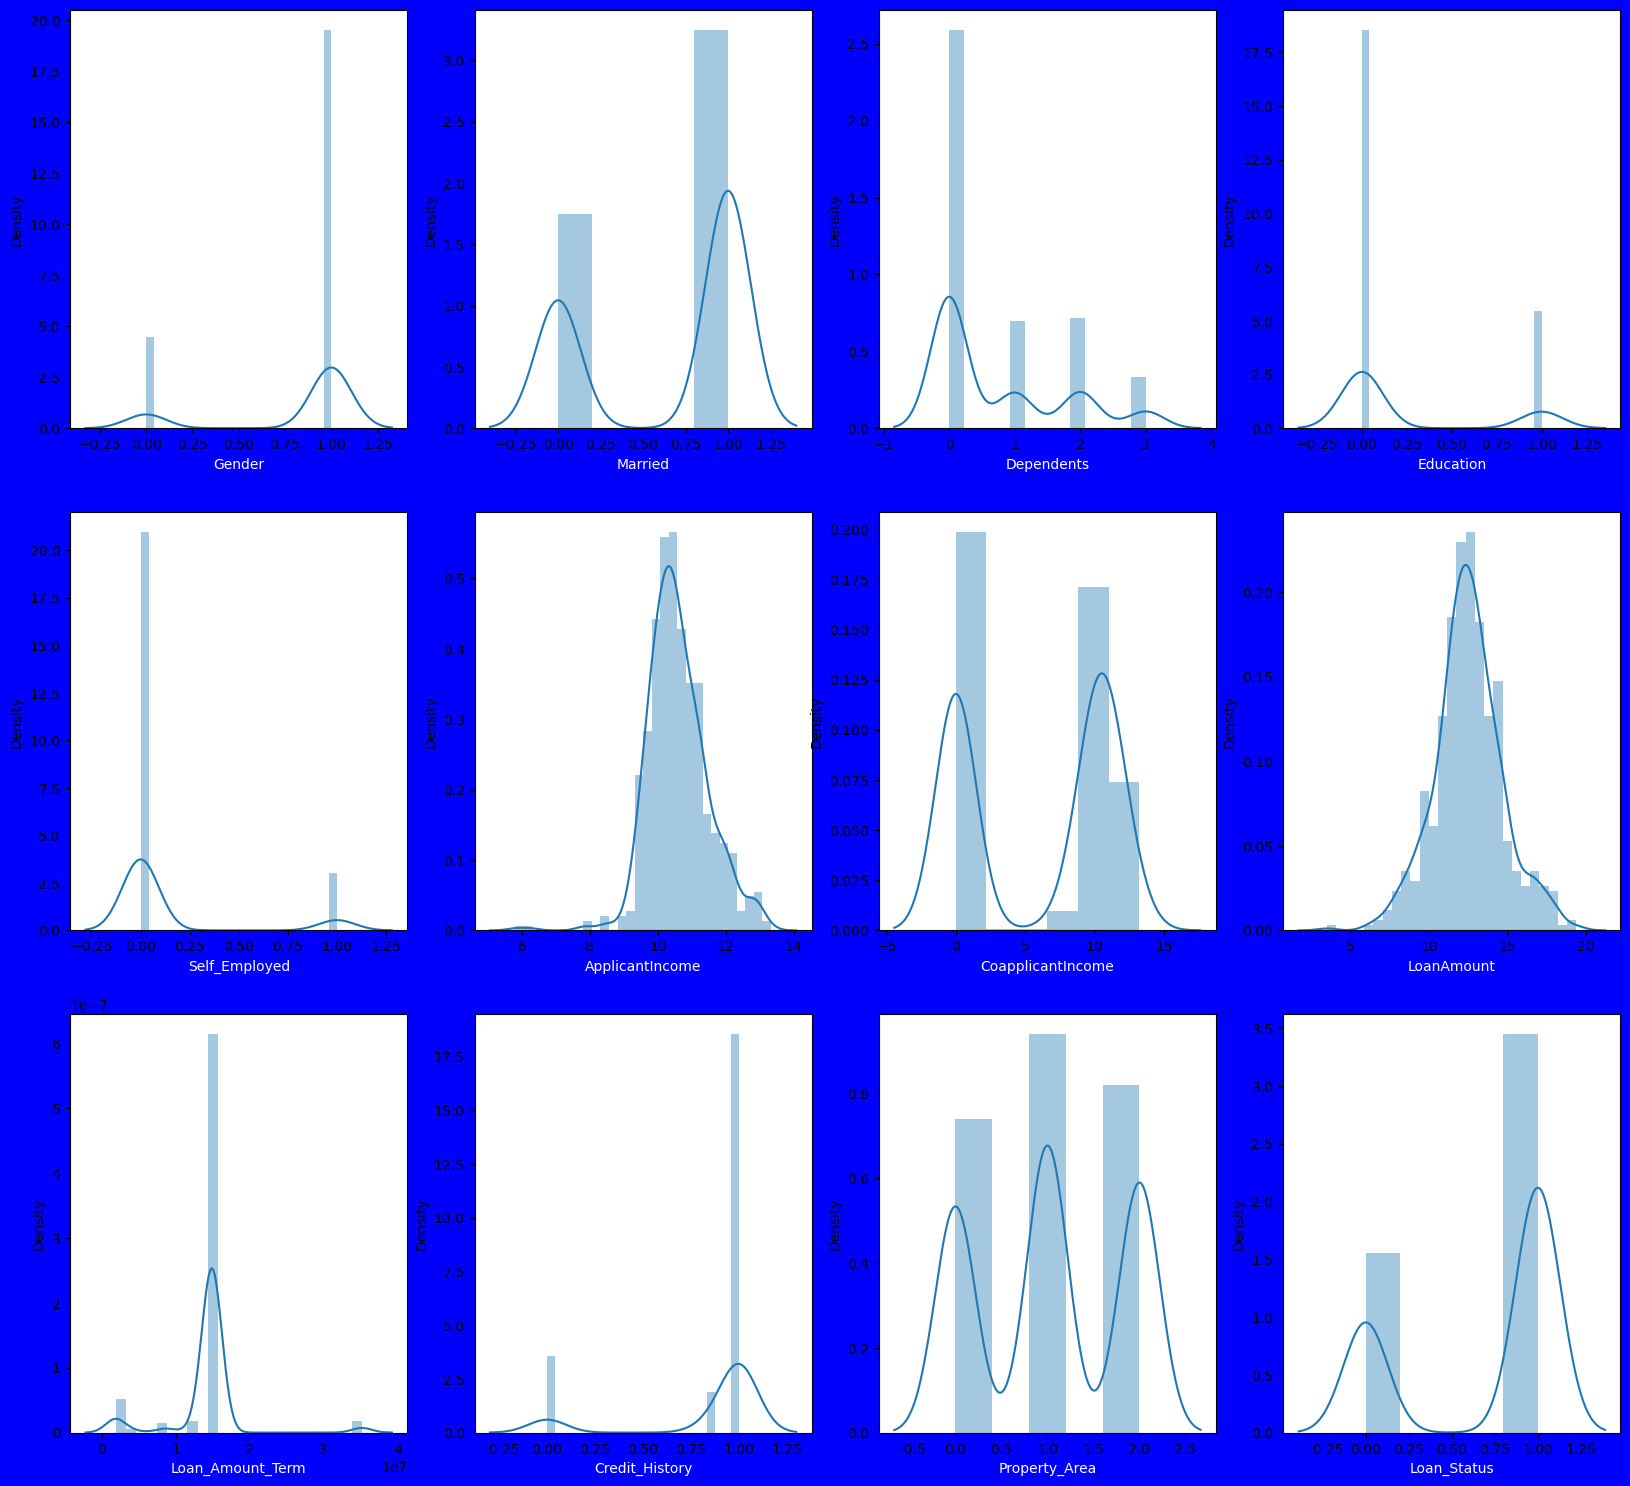

In [196]:
plt.figure(figsize = (20,25), facecolor = "blue")
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns):
        axs = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10,color = "white")
    plotnumber +=1
plt.show()

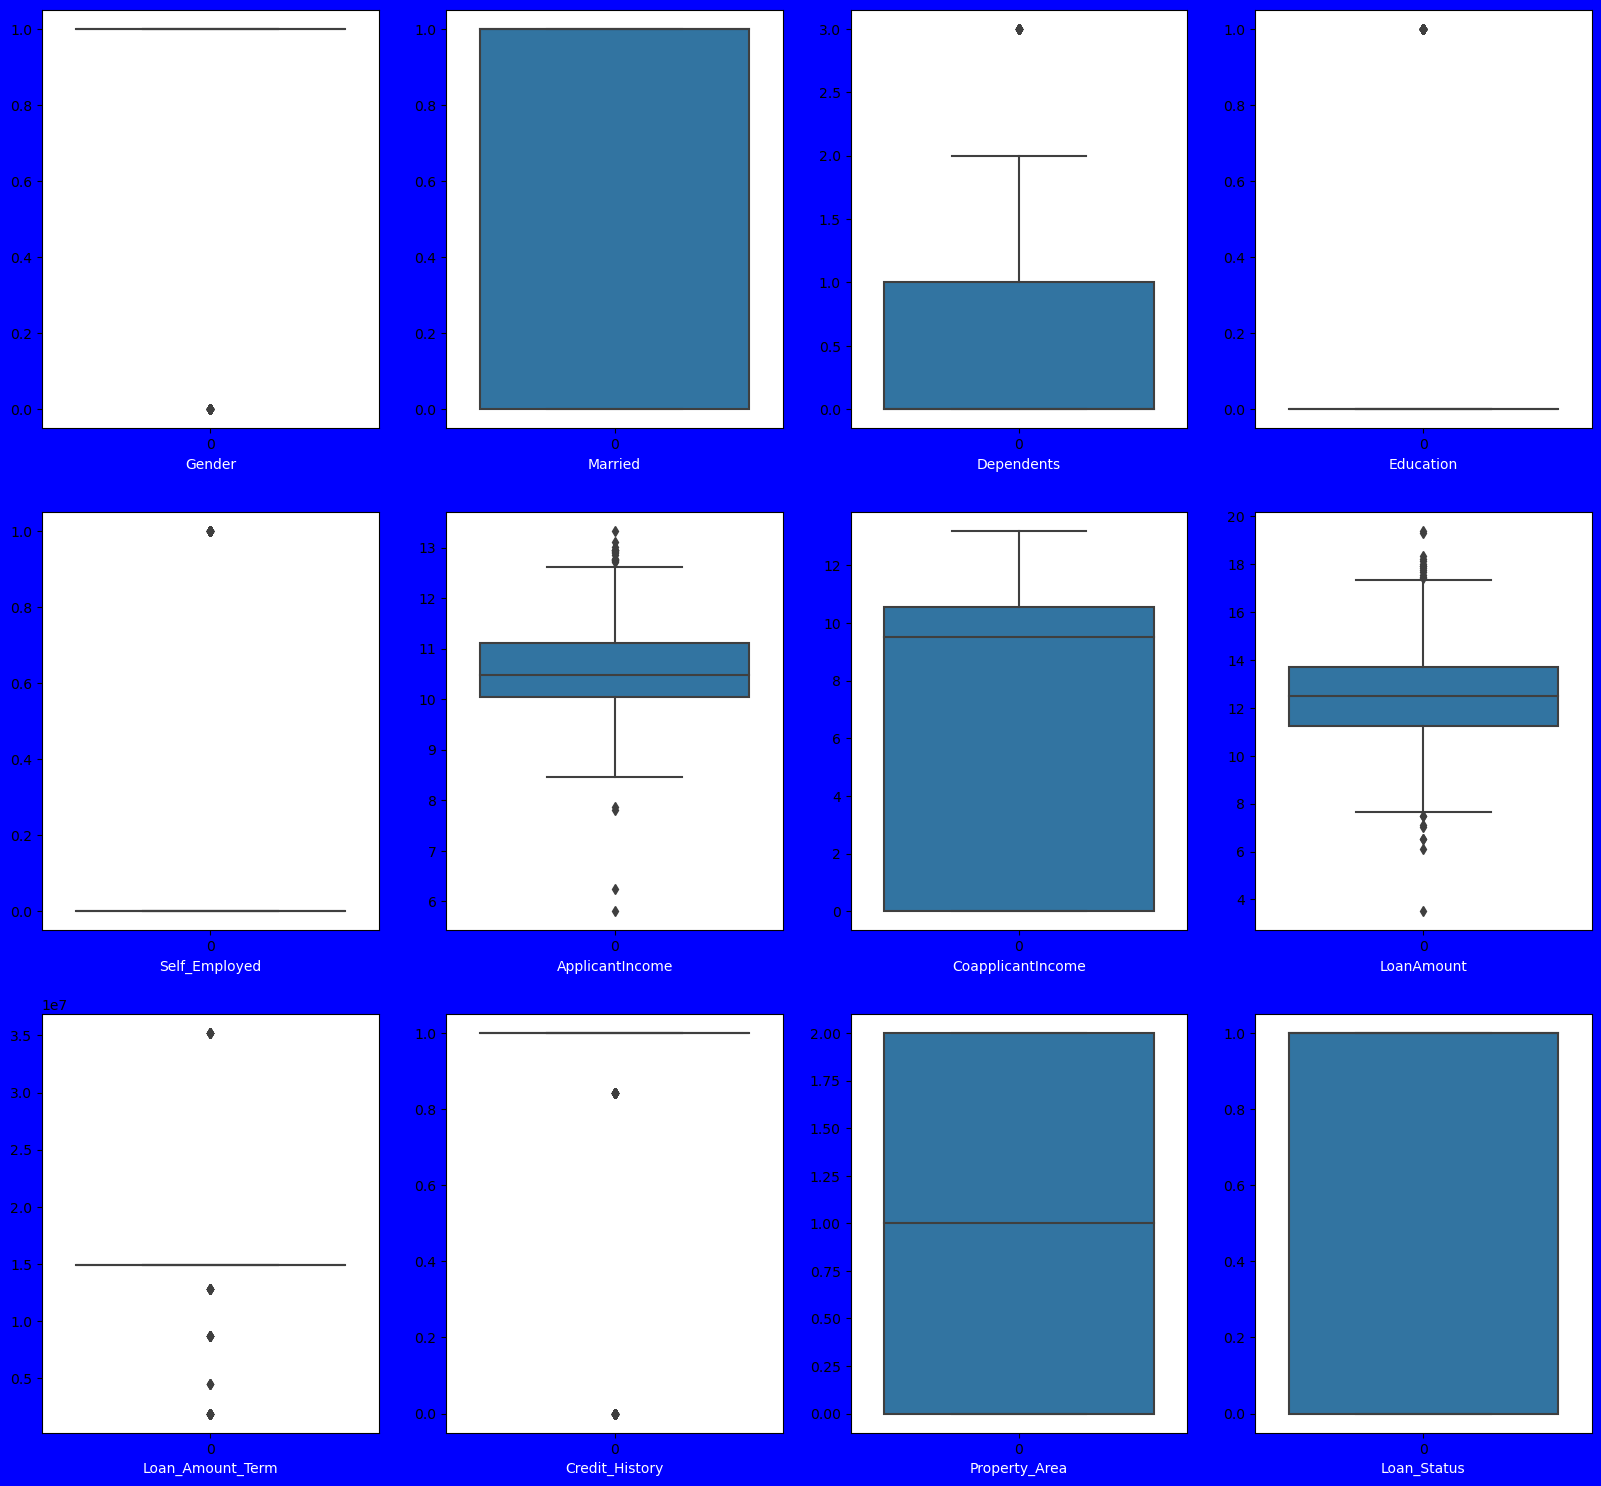

In [197]:
plt.figure(figsize = (20,25), facecolor = "blue")
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns):
        axs = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 10,color = "white")
    plotnumber +=1
plt.show()

In [198]:
df.shape

(577, 12)

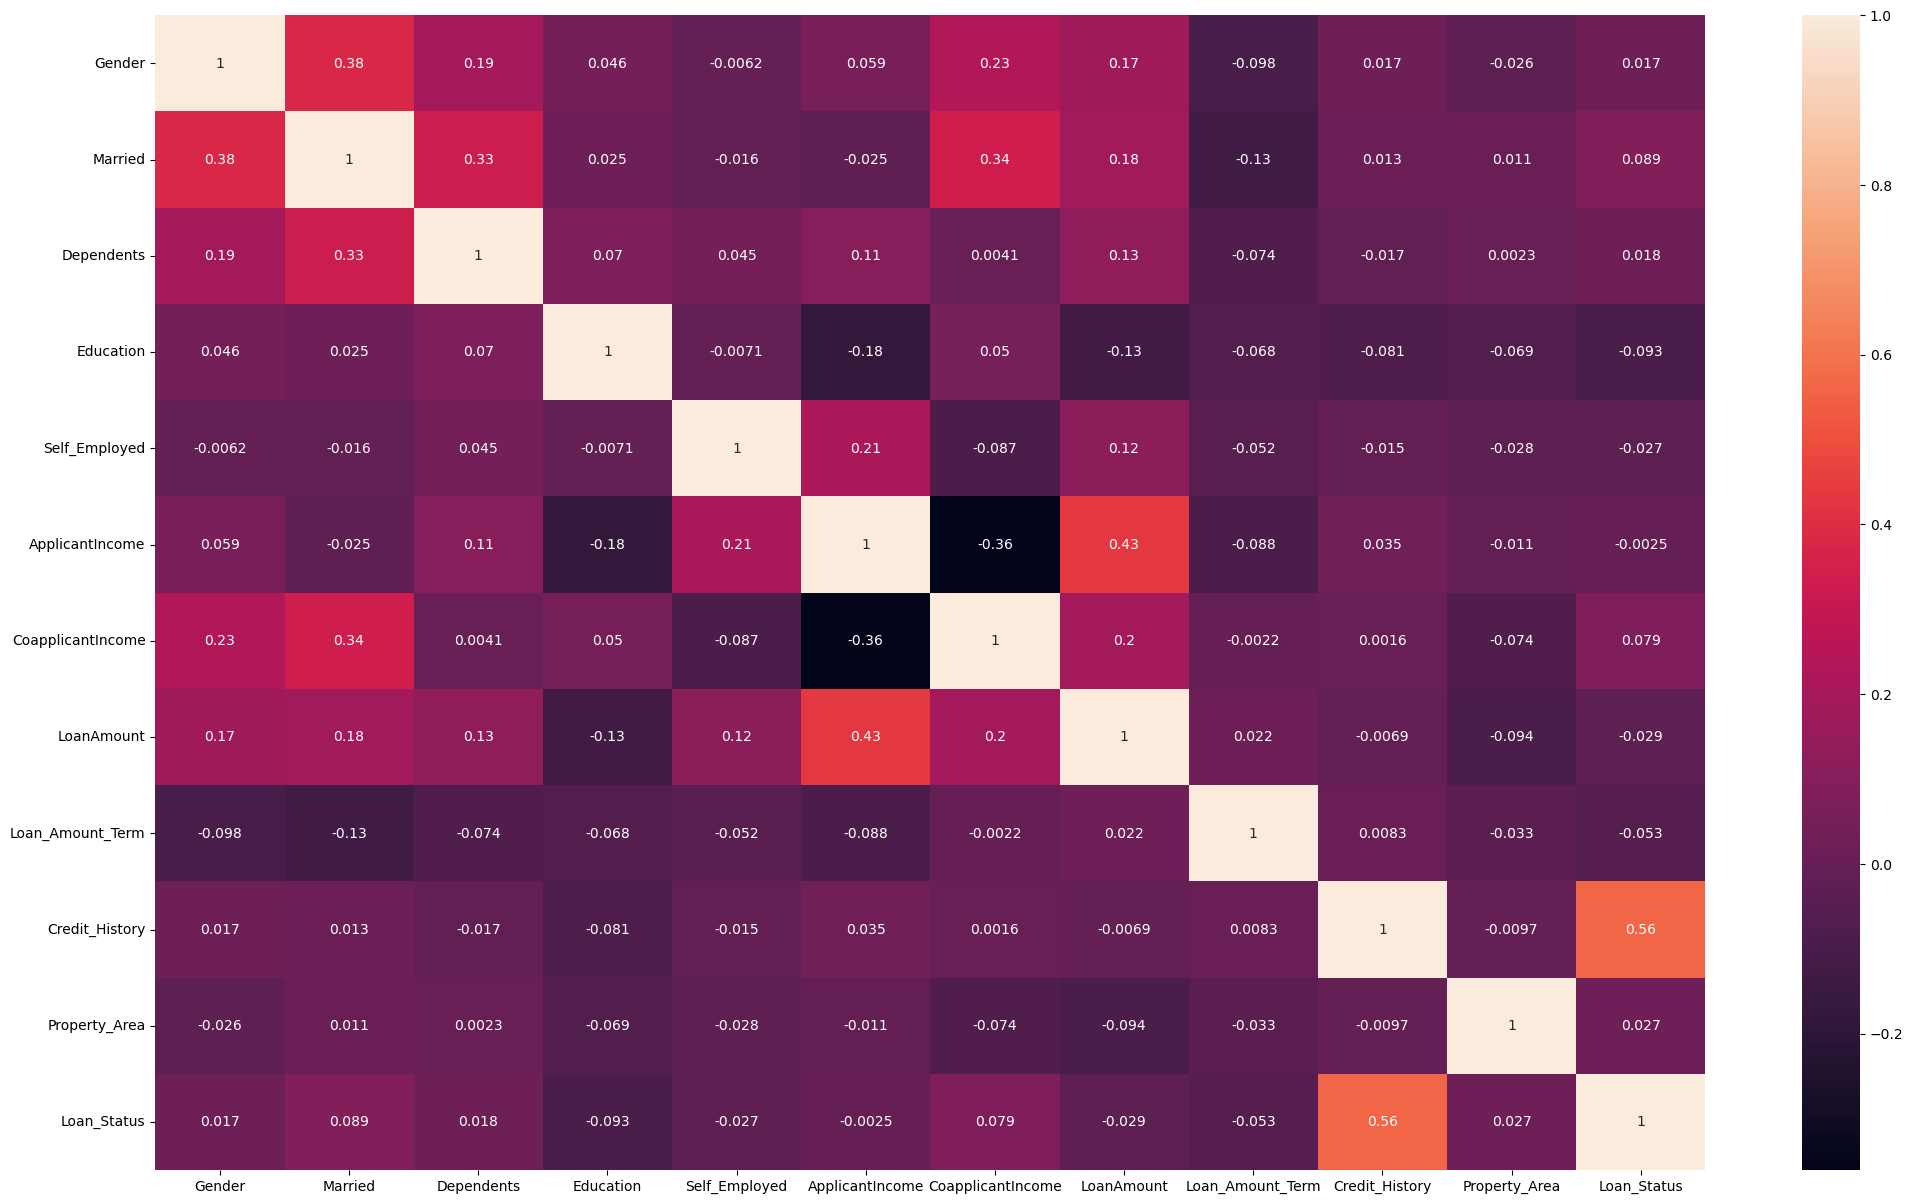

In [199]:
#Checking relationship Between Feature To Outcom And Feature To Feature
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,annot = True , annot_kws ={"size": 10})
plt.show()

In [200]:
y=df['Loan_Status']
X = df.drop(columns =['Loan_Status'])

In [201]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns =X.columns)

In [202]:
#Checking Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame({"Features":X.columns,"vif":[variance_inflation_factor(X,i) for i in range(X.shape[1])]})
vif

,Features,vif
0,Gender,1.221711
1,Married,1.417926
2,Dependents,1.167677
3,Education,1.067636
4,Self_Employed,1.053487
5,ApplicantIncome,1.764675
6,CoapplicantIncome,1.584426
7,LoanAmount,1.548226
8,Loan_Amount_Term,1.048157
9,Credit_History,1.010211


In [203]:
from imblearn.over_sampling import SMOTE
sm =SMOTE()
X,y = sm.fit_resample(X,y)
y.value_counts()

Loan_Status
1    398
0    398
Name: count, dtype: int64

# Classification

In [204]:
#Finding The Best Random Stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#Finding The Best Random State
max_accuracy = 0
best_rm = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 30,random_state = i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_rm = i
print("Maximum R Square Score :-",max_accuracy,"in This Random State",best_rm)

Maximum R Square Score :- 1.0 in This Random State 683


In [205]:
from sklearn.metrics import confusion_matrix,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 30,random_state = best_rm)

In [206]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
lgr_pred = lgr.predict(x_test)
print(accuracy_score(y_test,lgr_pred))
print(confusion_matrix(y_test,lgr_pred))
print(classification_report(y_test,lgr_pred))

0.6333333333333333
[[ 7 10]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.88      0.41      0.56        17
           1       0.55      0.92      0.69        13

    accuracy                           0.63        30
   macro avg       0.71      0.67      0.62        30
weighted avg       0.73      0.63      0.61        30



In [207]:
score = cross_val_score(lgr,x_train,y_train,cv = 5)
print(score)
print(score.mean()*100)
print("Difference Between Accuracy Score And Cross Validation Score Is:-",(accuracy_score(y_test,lgr_pred) - score.mean()))

[0.71428571 0.71895425 0.73202614 0.74509804 0.79084967]
74.02427637721755
Difference Between Accuracy Score And Cross Validation Score Is:- -0.10690943043884216


In [208]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred =rfc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,rfc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,rfc_pred))
print("Classification Report:-",classification_report(y_test,rfc_pred))


Accuracy Score:- 0.9666666666666667
Confusion Matrix:- [[17  0]
 [ 1 12]]
Classification Report:-               precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [209]:
score1 = cross_val_score(rfc,x_train,y_train,cv = 5)
print(score1)
print(score1.mean()*100)
print("Difference Between Accuracy Score And Cross Validation Score Is:-",(accuracy_score(y_test,rfc_pred) - score1.mean()))

[0.87662338 0.8496732  0.81045752 0.81045752 0.83660131]
83.67625838214072
Difference Between Accuracy Score And Cross Validation Score Is:- 0.12990408284525945


In [210]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred =etc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,etc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,etc_pred))
print("Classification Report:-",classification_report(y_test,etc_pred))

Accuracy Score:- 0.9
Confusion Matrix:- [[17  0]
 [ 3 10]]
Classification Report:-               precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.77      0.87        13

    accuracy                           0.90        30
   macro avg       0.93      0.88      0.89        30
weighted avg       0.91      0.90      0.90        30



In [211]:
score2 = cross_val_score(etc,x_train,y_train,cv = 5)
print(score2)
print(score2.mean()*100)
print("Difference Between Accuracy Score And Cross Validation Score Is:-",(accuracy_score(y_test,etc_pred) - score2.mean()))

[0.83766234 0.8627451  0.81045752 0.84313725 0.8496732 ]
84.07350819115524
Difference Between Accuracy Score And Cross Validation Score Is:- 0.05926491808844758


In [212]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred =svc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,svc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,svc_pred))
print("Classification Report:-",classification_report(y_test,svc_pred))

Accuracy Score:- 0.8
Confusion Matrix:- [[12  5]
 [ 1 12]]
Classification Report:-               precision    recall  f1-score   support

           0       0.92      0.71      0.80        17
           1       0.71      0.92      0.80        13

    accuracy                           0.80        30
   macro avg       0.81      0.81      0.80        30
weighted avg       0.83      0.80      0.80        30



In [213]:
score3 = cross_val_score(svc,x_train,y_train,cv = 5)
print(score3)
print(score3.mean()*100)
print("Difference Between Score Accuracy And Cross Validation Score Is:-",(accuracy_score(y_test,svc_pred) - score3.mean()))

[0.75324675 0.75163399 0.7254902  0.73202614 0.77124183]
74.67277820218997
Difference Between Score Accuracy And Cross Validation Score Is:- 0.053272217978100334


In [214]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,gbc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,gbc_pred))
print("Classification Report:-",classification_report(y_test,gbc_pred))

Accuracy Score:- 0.9333333333333333
Confusion Matrix:- [[16  1]
 [ 1 12]]
Classification Report:-               precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [215]:
score4 = cross_val_score(gbc,x_train,y_train,cv = 5)
print(score4)
print(score4.mean()*100)
print("Difference Between Accuracy Score And Cross Validation Score Is:-",(accuracy_score(y_test,gbc_pred) - score4.mean()))

[0.7987013  0.81699346 0.81699346 0.77777778 0.82352941]
80.67990832696715
Difference Between Accuracy Score And Cross Validation Score Is:- 0.1265342500636618


In [216]:
from sklearn.ensemble import AdaBoostClassifier
adbc = AdaBoostClassifier()
adbc.fit(x_train,y_train)
adbc_pred =adbc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,adbc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,adbc_pred))
print("Classification Report:-",classification_report(y_test,adbc_pred))

Accuracy Score:- 0.9333333333333333
Confusion Matrix:- [[15  2]
 [ 0 13]]
Classification Report:-               precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.87      1.00      0.93        13

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



In [217]:
score5 = cross_val_score(adbc,x_train,y_train,cv = 5)
print(score5)
print(score5.mean()*100)
print("Difference Between Accuracy Score And Cross Validation Score Is:-",(accuracy_score(y_test,adbc_pred) - score5.mean()))

[0.76623377 0.76470588 0.79084967 0.75816993 0.74509804]
76.50114591291062
Difference Between Accuracy Score And Cross Validation Score Is:- 0.16832187420422717


In [218]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier()
bgc.fit(x_train,y_train)
bgc_pred =bgc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,bgc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,bgc_pred))
print("Classification Report:-",classification_report(y_test,bgc_pred))

Accuracy Score:- 0.9666666666666667
Confusion Matrix:- [[17  0]
 [ 1 12]]
Classification Report:-               precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [219]:
score6 = cross_val_score(bgc,x_train,y_train,cv = 5)
print(score6)
print(score6.mean()*100)
print("Difference Between Accuracy Score And Cross Validation Score Is:-",(accuracy_score(y_test,bgc_pred) - score6.mean()))

[0.7987013  0.83006536 0.81045752 0.75163399 0.79084967]
79.63415669298023
Difference Between Accuracy Score And Cross Validation Score Is:- 0.17032509973686438


In [220]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred =gnb.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,gnb_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,gnb_pred))
print("Classification Report:-",classification_report(y_test,gnb_pred))

Accuracy Score:- 0.6333333333333333
Confusion Matrix:- [[ 7 10]
 [ 1 12]]
Classification Report:-               precision    recall  f1-score   support

           0       0.88      0.41      0.56        17
           1       0.55      0.92      0.69        13

    accuracy                           0.63        30
   macro avg       0.71      0.67      0.62        30
weighted avg       0.73      0.63      0.61        30



In [221]:
score7 = cross_val_score(gnb,x_train,y_train,cv = 5)
print(score7)
print(score7.mean()*100)
print("Difference Between Accuracy Score And Cross Validation Score Is:-",(accuracy_score(y_test,gnb_pred) - score7.mean()))

[0.72727273 0.73202614 0.7254902  0.73856209 0.75816993]
73.63042186571597
Difference Between Accuracy Score And Cross Validation Score Is:- -0.10297088532382648


In [222]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred =dtc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,dtc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,dtc_pred))
print("Classification Report:-",classification_report(y_test,dtc_pred))

Accuracy Score:- 1.0
Confusion Matrix:- [[17  0]
 [ 0 13]]
Classification Report:-               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [223]:
score8 = cross_val_score(dtc,x_train,y_train,cv = 5)
print(score8)
print(score8.mean()*100)
print("Difference Between Accuracy Score And Cross Validation Score Is:-",(accuracy_score(y_test,dtc_pred) - score8.mean()))

[0.72077922 0.75816993 0.83660131 0.73202614 0.77777778]
76.50708768355827
Difference Between Accuracy Score And Cross Validation Score Is:- 0.23492912316441728


####  Our Best Model Is ExtraTreesClassifier Now We Go For Hyper PerameterTuning.

In [224]:
param_grid = {"n_estimators":[50,100,200],
             "criterion":['gini','entropy'],
             "max_depth":[None,10,20],
             "min_samples_split":[2,5,10],
             "min_samples_leaf":[1,2,5],
             "max_features":['auto','sqrt'],
             "bootstrap":[True,False]}

In [225]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator =etc,param_grid = param_grid, scoring ='accuracy',cv =5)

In [226]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [227]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [228]:
Final_Model = ExtraTreesClassifier(criterion='gini',max_depth = None, max_features = 'sqrt',min_samples_leaf = 1,min_samples_split= 2,n_estimators = 200,bootstrap = False)
Final_Model.fit(x_train,y_train)
final_pred = Final_Model.predict(x_test)
acc = accuracy_score(y_test,final_pred)
print(acc*100)

90.0


In [229]:
import joblib
joblib.dump(Final_Model,"Loan Application Status.pkl")

['Loan Application Status.pkl']